In [ ]:
# Reference 
# 1. https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html
#2. https://learnopencv.com/contour-detection-using-opencv-python-c/

In [254]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import traceback

100.0


Text(0.5, 1.0, 'Original Image')

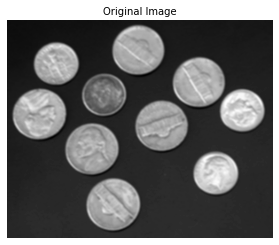

In [273]:
path = r'F:\img\coins.jpg'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img = cv2.GaussianBlur(img,(3,3),1.0)
threshold, bw = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)  
# threshold, bw = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)  
print(threshold)
fig, axs = plt.subplots(1,1)

axs.imshow(img,cmap='gray')
axs.axis('off')
axs.set_title('Original Image',fontsize='medium')

### Connected Components

11
[ 0  1  2  3  4  5  6  7  8  9 10]


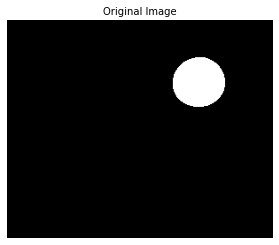

In [263]:
n, img_label = cv2.connectedComponents(bw)
temp = np.zeros_like(img_label)
print(n)
print(np.unique(img_label))

plt.imshow(img_label==3,cmap='gray')
# index = np.all(img_label == 0, axis=-1)
# x[index] = [255]
# print(x.shape)
# plt.imshow(x,cmap='gray')
plt.axis('off')
plt.title('Original Image',fontsize='medium')
plt.show()

### Contours (Boundary)

References
https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_properties/py_contour_properties.html

In [290]:
path= r'F:\img\coins.jpg'
img = cv2.imread(path,cv2.IMREAD_COLOR)
temp = np.zeros_like(img)

gray =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh, out = cv2.threshold(gray,100,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(out,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(temp,contours,-1,(0,0,255),2)
cv2.imshow('Contours', temp)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [265]:
# Count the contours
print(len(contours))

10


In [269]:
#Draw a specific contour based on ID
temp = np.zeros_like(img)
cv2.drawContours(temp,contours,2,(0,0,255),3)
# To fill the contour change the last parameter to negative
# cv2.drawContours(temp,contours,2,(0,0,255),-1)
# White
# cv2.drawContours(temp,contours,2,(255,255,255),-1)

cv2.imshow('Contours', temp)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Bounding Box or Bounding Rectangle

(<matplotlib.image.AxesImage at 0x164aa8f3340>, (-0.5, 299.5, 245.5, -0.5))

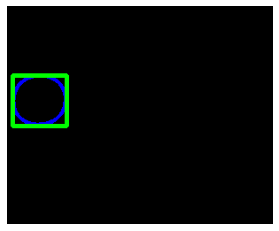

In [270]:
id = 5
temp = np.zeros_like(img)
cv2.drawContours(temp,contours,id,(0,0,255),3)
x,y,w,h = cv2.boundingRect(contours[id])
cv2.rectangle(temp,(x,y),(x+w,y+h),(0,255,0),3)
plt.imshow(temp), plt.axis('off')

### Cropping an image object

(<matplotlib.image.AxesImage at 0x164aa93e4c0>, (-0.5, 60.5, 56.5, -0.5))

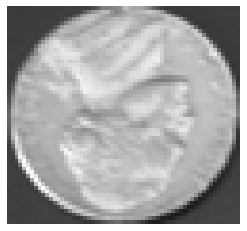

In [271]:
crop = img[y:y+h, x:x+w]
plt.imshow(crop), plt.axis('off')

In [272]:
cv2.imwrite('cropped.jpg', crop)

True

(<matplotlib.image.AxesImage at 0x164abb902b0>, (-0.5, 325.5, 254.5, -0.5))

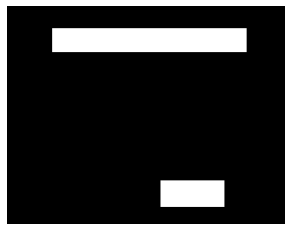

In [280]:
 # Aspect Ratio
path= r'F:\img\2.jpg'
img = cv2.imread(path,cv2.IMREAD_COLOR)
temp = np.zeros_like(img)

gray =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh, out = cv2.threshold(gray,100,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(out,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# filter contours based on height and width
for i in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    aspectRatio = w/h
    if(aspectRatio>=2.0 and h>10):
        cv2.drawContours(temp,contours,i,(255,255,255),-1)
# cv2.drawContours(img,contours,-1,(255,0,0),2)
plt.imshow(temp), plt.axis('off')

### Rotated Bounding Rectangle

(<matplotlib.image.AxesImage at 0x164abbdd580>, (-0.5, 256.5, 224.5, -0.5))

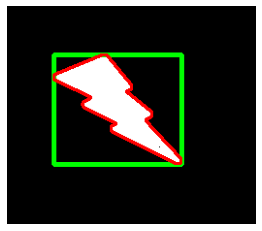

In [281]:
path= r'F:\img\1.jpg'
img = cv2.imread(path,cv2.IMREAD_COLOR)
temp = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh, out = cv2.threshold(img,200,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(out,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
if(len(contours)<=0):
    print('Not found')
x,y,w,h = cv2.boundingRect(contours[0])
cv2.rectangle(temp,(x,y),(x+w,y+h),(0,255,0),3)
cv2.drawContours(temp,contours,-1,(255,0,0),2)
plt.imshow(temp), plt.axis('off')


(<matplotlib.image.AxesImage at 0x164abc2cfd0>, (-0.5, 256.5, 224.5, -0.5))

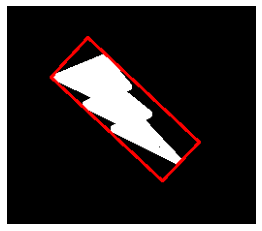

In [282]:
path= r'F:\img\1.jpg'
img = cv2.imread(path,cv2.IMREAD_COLOR)
temp = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh, out = cv2.threshold(img,200,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(out,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

if(len(contours)<=0):
    print('Not found')

# minAreaRect returns Box2D structure which contains following details 
# ( center (x,y), (width, height), angle of rotation )
rect = cv2.minAreaRect(contours[0])
# boxPoints() is used to obtain four corners of the rectangle from Box2D
box = cv2.boxPoints(rect)
# to integer values
box = np.int0(box)

cv2.drawContours(img,[box],0,(0,0,255),2)
x,y,w,h = cv2.boundingRect(contours[0])
# cv2.rectangle(temp,(x,y),(x+w,y+h),(0,255,0),3)
#pass points as list to draw
cv2.drawContours(temp,[box],-1,(255,0,0),2)
plt.imshow(temp), plt.axis('off')


### Area from Contours

In [291]:
id = 0
temp = np.zeros_like(img)
cv2.drawContours(temp,contours,id,(0,0,255),3)
x,y,w,h = cv2.boundingRect(contours[id])
# cv2.rectangle(temp,(x,y),(x+w,y+h),(255,255,0),3)
area = cv2.contourArea(contours[id])
print(area)
# cv2.putText(temp,area,(x+20,y),cv2.FONT_HERSHEY_COMPLEX,1)
# cv2.putText(temp, str(area), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
# plt.imshow(temp, cmap='gray'), plt.axis('off')

2711.5


### Area of All contours

In [292]:
for i in range(len(contours)):
    area =  cv2.contourArea(contours[i])
    print(area)

2711.5
1865.0
2641.0
2565.5
1836.0
2610.0
1771.5
2516.5
1829.5
2482.0


### Smallest or Largest Contours

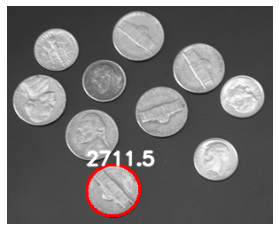

In [293]:
maxArea = 0.0
maxID = -1
for i in range(len(contours)):
    area =  cv2.contourArea(contours[i])
    if area>=maxArea:
        maxID = i
        maxArea = area
if(maxID>-1):
    temp = img.copy()
    cv2.drawContours(temp, contours,maxID,(255,0,0),2)
    x,y,w,h = cv2.boundingRect(contours[maxID])
    cv2.putText(temp, str(maxArea), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
    plt.imshow(temp), plt.axis('off')
else:
    print('Something is wrong')


### Calculate center of a contour

(<matplotlib.image.AxesImage at 0x164aaa038e0>, (-0.5, 299.5, 245.5, -0.5))

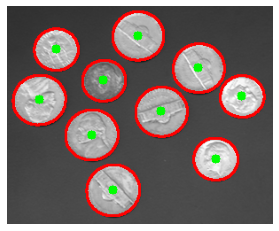

In [294]:
temp = img.copy()

for i in range(len(contours)):
    M = cv2.moments(contours[i])
    x = int(M["m10"] / M["m00"])
    y = int(M["m01"] / M["m00"])
    cv2.circle(temp, (x, y), 5, (0, 255, 0), -1)
    cv2.drawContours(temp, contours,i,(255,0,0),2)
plt.imshow(temp), plt.axis('off')


### Perimeter of object using contours

(<matplotlib.image.AxesImage at 0x164abcb4940>, (-0.5, 299.5, 245.5, -0.5))

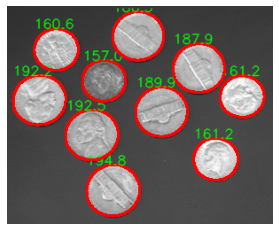

In [295]:
temp = img.copy()
for i in range(len(contours)):
    parameter = cv2.arcLength(contours[i],True)
    cv2.drawContours(temp, contours,i,(255,0,0),2)
    
    x,y,w,h = cv2.boundingRect(contours[i])
    cv2.putText(temp, str(round(parameter,1)), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(temp), plt.axis('off')

### Contour Approximation

Text(0.5, 1.0, 'Original Image')

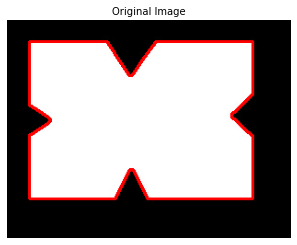

In [296]:
path = r'F:\img\rect.jpg'
img = cv2.imread(path, cv2.IMREAD_COLOR)
gray =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
threshold, bw = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)  
contours, hierarchy = cv2.findContours(bw,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

temp =  img.copy()
for i in range(len(contours)):
    cv2.drawContours(temp, contours,i,(255,0,0),2)
    
fig, axs = plt.subplots(1,1)
axs.imshow(temp,cmap='gray')
axs.axis('off')
axs.set_title('Original Image',fontsize='medium')

Text(0.5, 1.0, 'Original Contour')

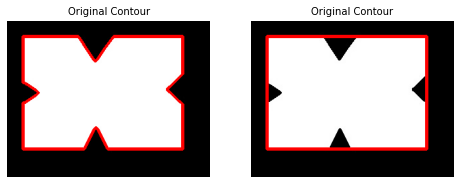

In [300]:
# It approximates a contour shape to another 
# shape with less number of vertices depending upon the precision we specify.

# Epsilon, which is maximum distance from contour to approximated contour

# epsilon = 0.1*cv2.arcLength(contours[0],True)
# print(epsilon)
epsilon = 40
approx = cv2.approxPolyDP(contours[0],epsilon,True)

temp =  img.copy()
temp1 =  img.copy()
cv2.drawContours(temp, contours,-1,(255,0,0),3)
cv2.drawContours(temp1, [approx],-1,(255,0,0),3)

fig, axs = plt.subplots(1,2,figsize=(8,8))
axs[0].imshow(temp,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Contour',fontsize='medium')

axs[1].imshow(temp1,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Original Contour',fontsize='medium')

### Convex Hull

Text(0.5, 1.0, 'Original Contour')

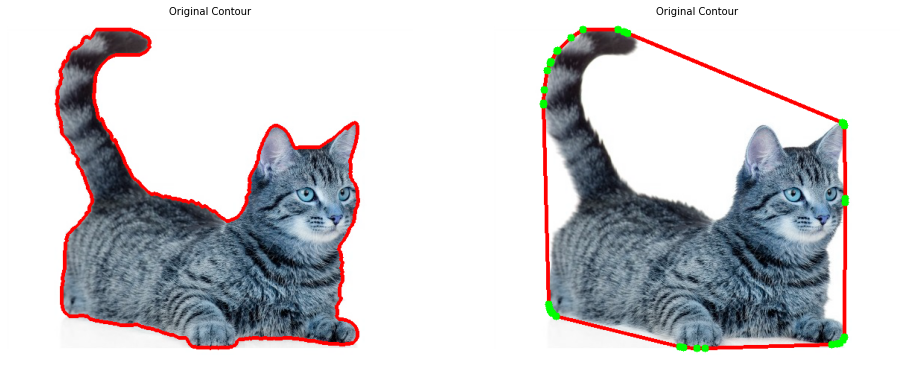

In [301]:
path = r'F:\img\cat1.jpg'
img = cv2.imread(path, cv2.IMREAD_COLOR)
gray =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3,3),1.0)
threshold, bw = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)  
contours, hierarchy = cv2.findContours(bw,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
hull = cv2.convexHull(contours[0])

temp1 =  img.copy()
temp2 =  img.copy()

cv2.drawContours(temp1, contours,-1,(255,0,0),3)
cv2.drawContours(temp2, [hull],-1,(255,0,0),3)

#draw hull points
for i in range(len(hull)):
    p = hull[i]
    cv2.circle(temp2,(p[0][0],p[0][1]),5,(0,255,0),-1)
    
    
fig, axs = plt.subplots(1,2,figsize=(16,8))
axs[0].imshow(temp1)
axs[0].axis('off')
axs[0].set_title('Original Contour',fontsize='medium')

axs[1].imshow(temp2)
axs[1].axis('off')
axs[1].set_title('Original Contour',fontsize='medium')

In [302]:
print(hull)
h = hull[0]
h[0][1]

[[[471 243]]

 [[470 424]]

 [[468 428]]

 [[464 432]]

 [[460 433]]

 [[453 434]]

 [[283 439]]

 [[272 439]]

 [[254 438]]

 [[249 437]]

 [[ 83 396]]

 [[ 78 392]]

 [[ 77 391]]

 [[ 75 388]]

 [[ 74 385]]

 [[ 73 380]]

 [[ 66 112]]

 [[ 66 110]]

 [[ 67  92]]

 [[ 71  66]]

 [[ 75  56]]

 [[ 76  54]]

 [[ 84  40]]

 [[ 85  39]]

 [[103  22]]

 [[119  11]]

 [[166  11]]

 [[174  14]]

 [[179  16]]

 [[467 136]]

 [[469 137]]

 [[470 140]]

 [[471 238]]]


243

In [ ]:
### Home Practice 
# Checking Convexity isContourConvex(). 
# how to fit a line
# how to Fitting an Ellipse
# Minimum Enclosing Circle

#Reference
# https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html